In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pylab import mpl
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
# sns.set_style('darkgrid')
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [2]:
train_df = pd.read_csv('../data/train.csv', encoding='gbk')
test_df = pd.read_csv('../data/test.csv', encoding='gbk')
train_df.shape

(5642, 42)

# 数据分析
## 首先对数据的分布有一个大致的了解，如查看缺失值比例，数据分布等，有助于做针对性的预处理

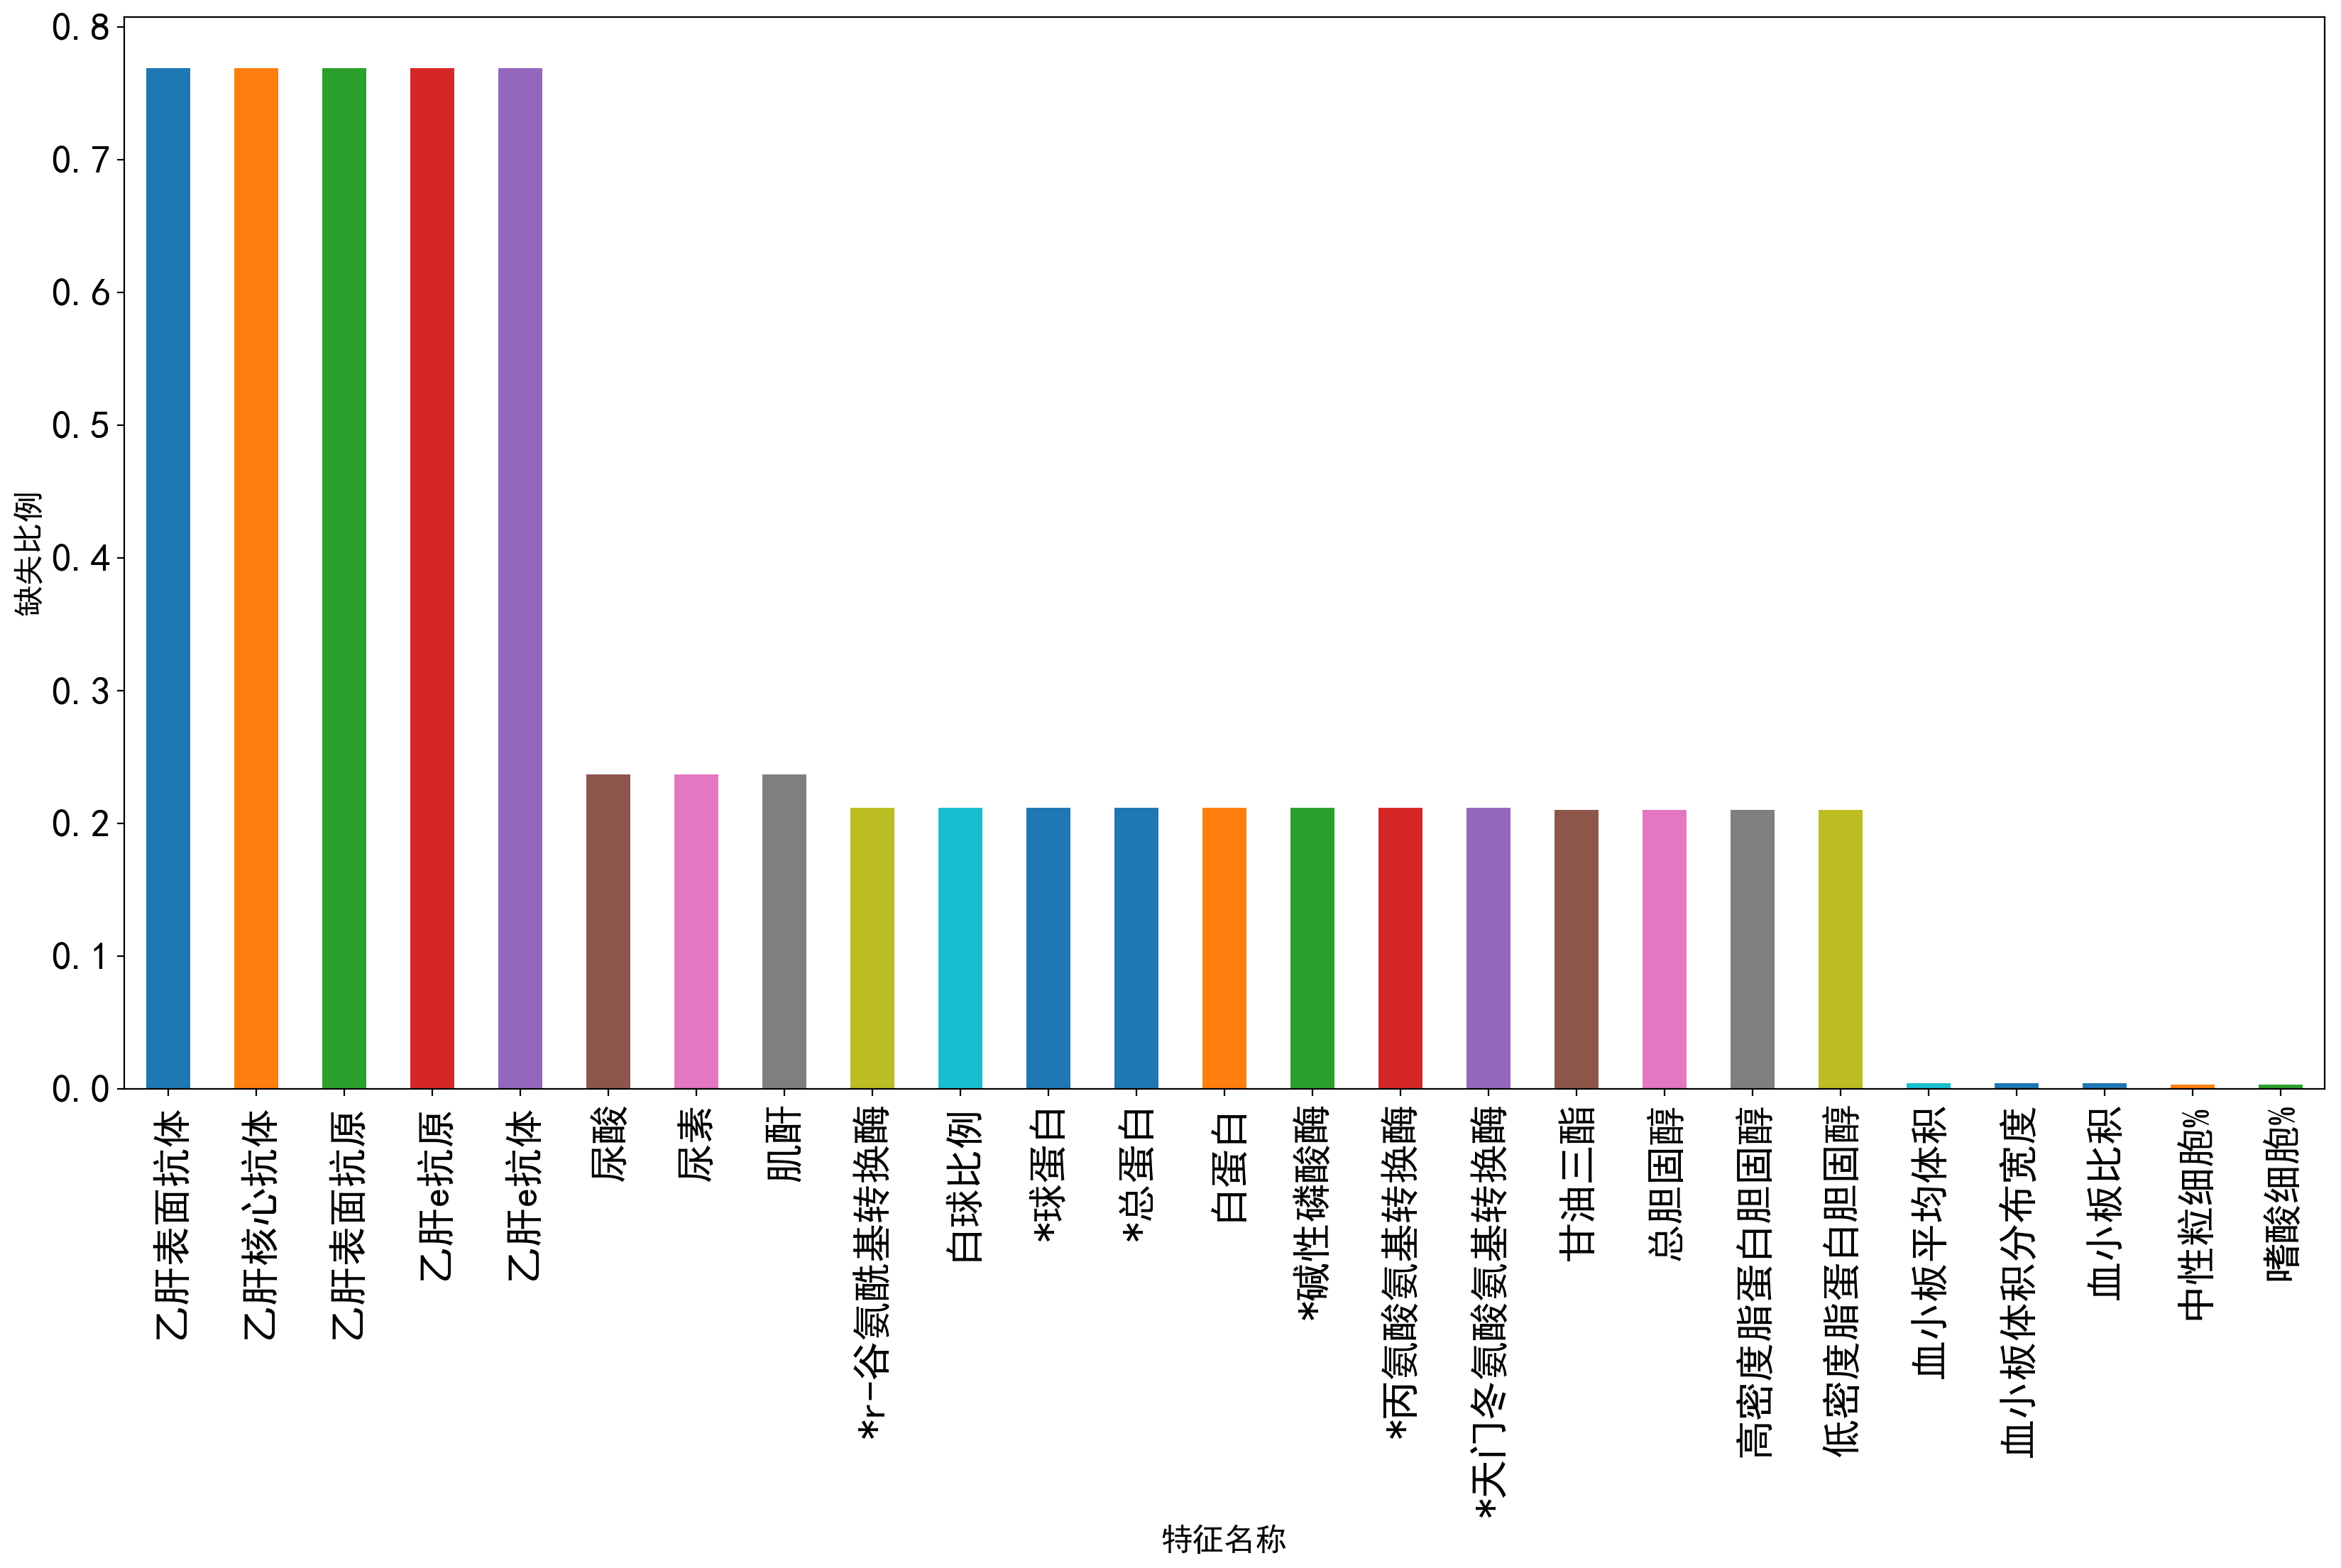

['乙肝表面抗体', '乙肝核心抗体', '乙肝表面抗原', '乙肝e抗原', '乙肝e抗体']

In [3]:
# 查看缺失数据比例
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
a =  df.isnull().sum() / len(df)
b = a.sort_values(ascending=False)[:25]
fig=plt.figure(figsize=(20, 10), dpi= 200, facecolor='w', edgecolor='k')
b.plot(kind='bar', fontsize=20)
plt.xlabel('特征名称', fontsize=16)
plt.ylabel('缺失比例', fontsize=16)
plt.show()
list(b[:5].index)

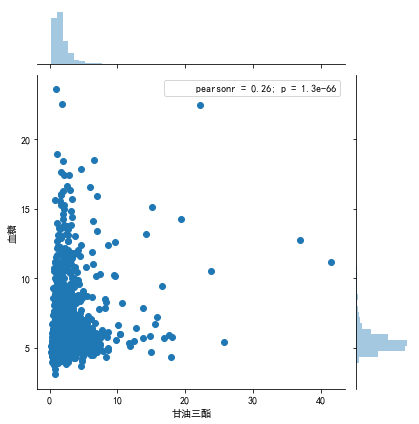

In [4]:
# 查看单个特征与血糖的相关性
fig=plt.figure(figsize=(20, 20), dpi= 200, facecolor='w', edgecolor='k')
sns.jointplot(x='甘油三酯',y='血糖',data=train_df)
plt.show()

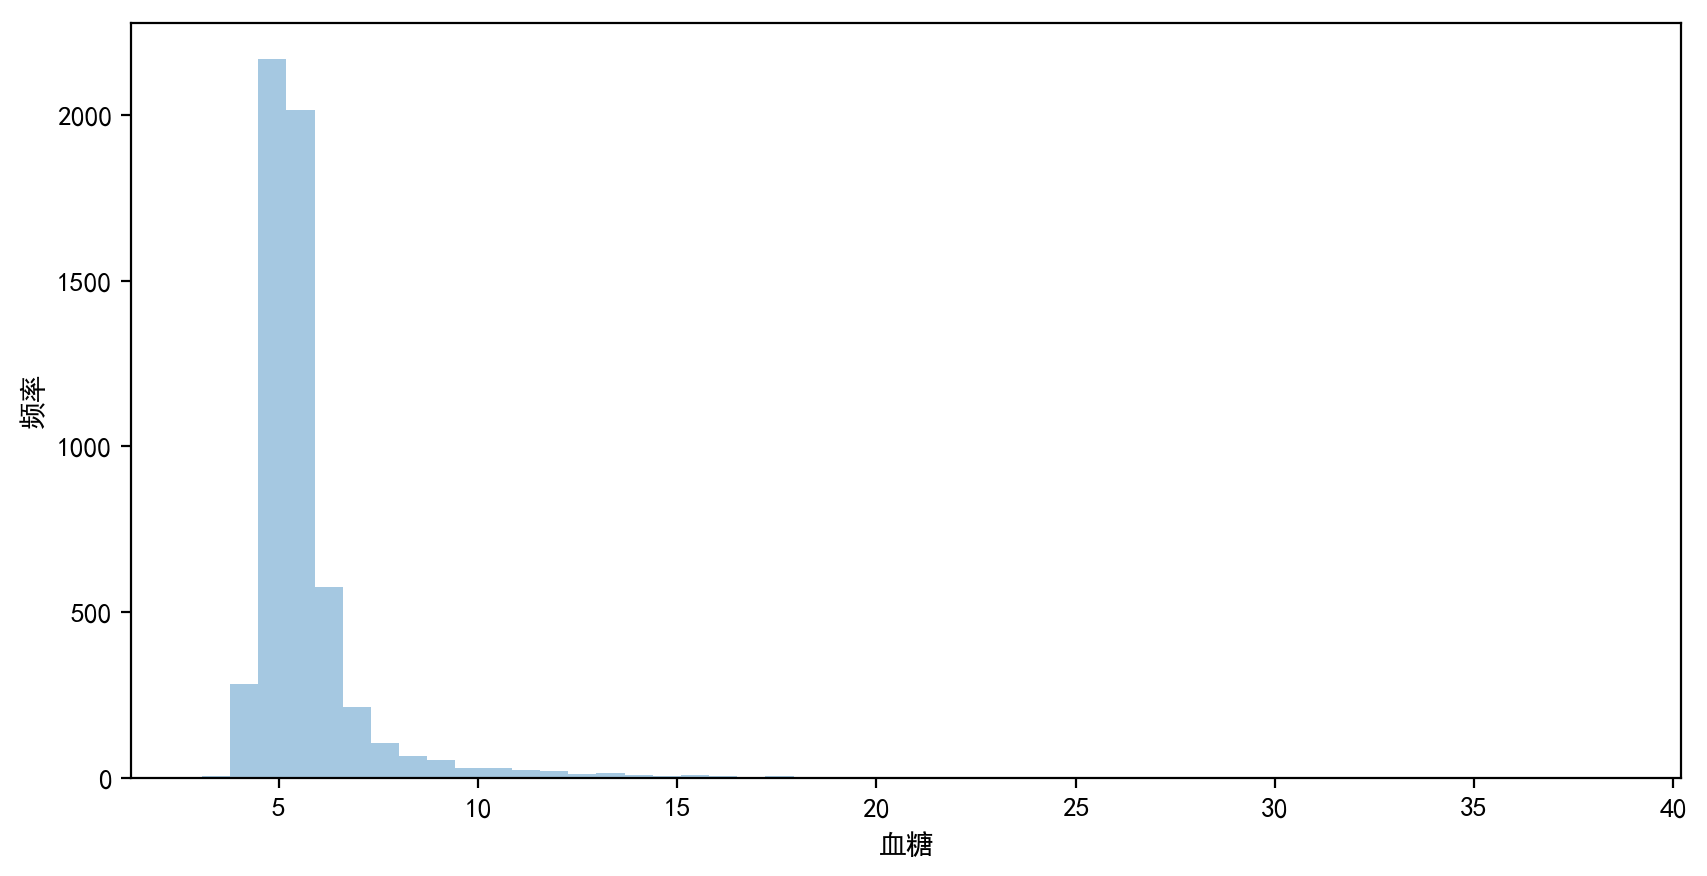

In [5]:
# 查看血糖分布
fig=plt.figure(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
sns.distplot(train_df['血糖'], kde=False)
plt.ylabel('频率')
# plt.xlim(xmax = 10)  
plt.show()

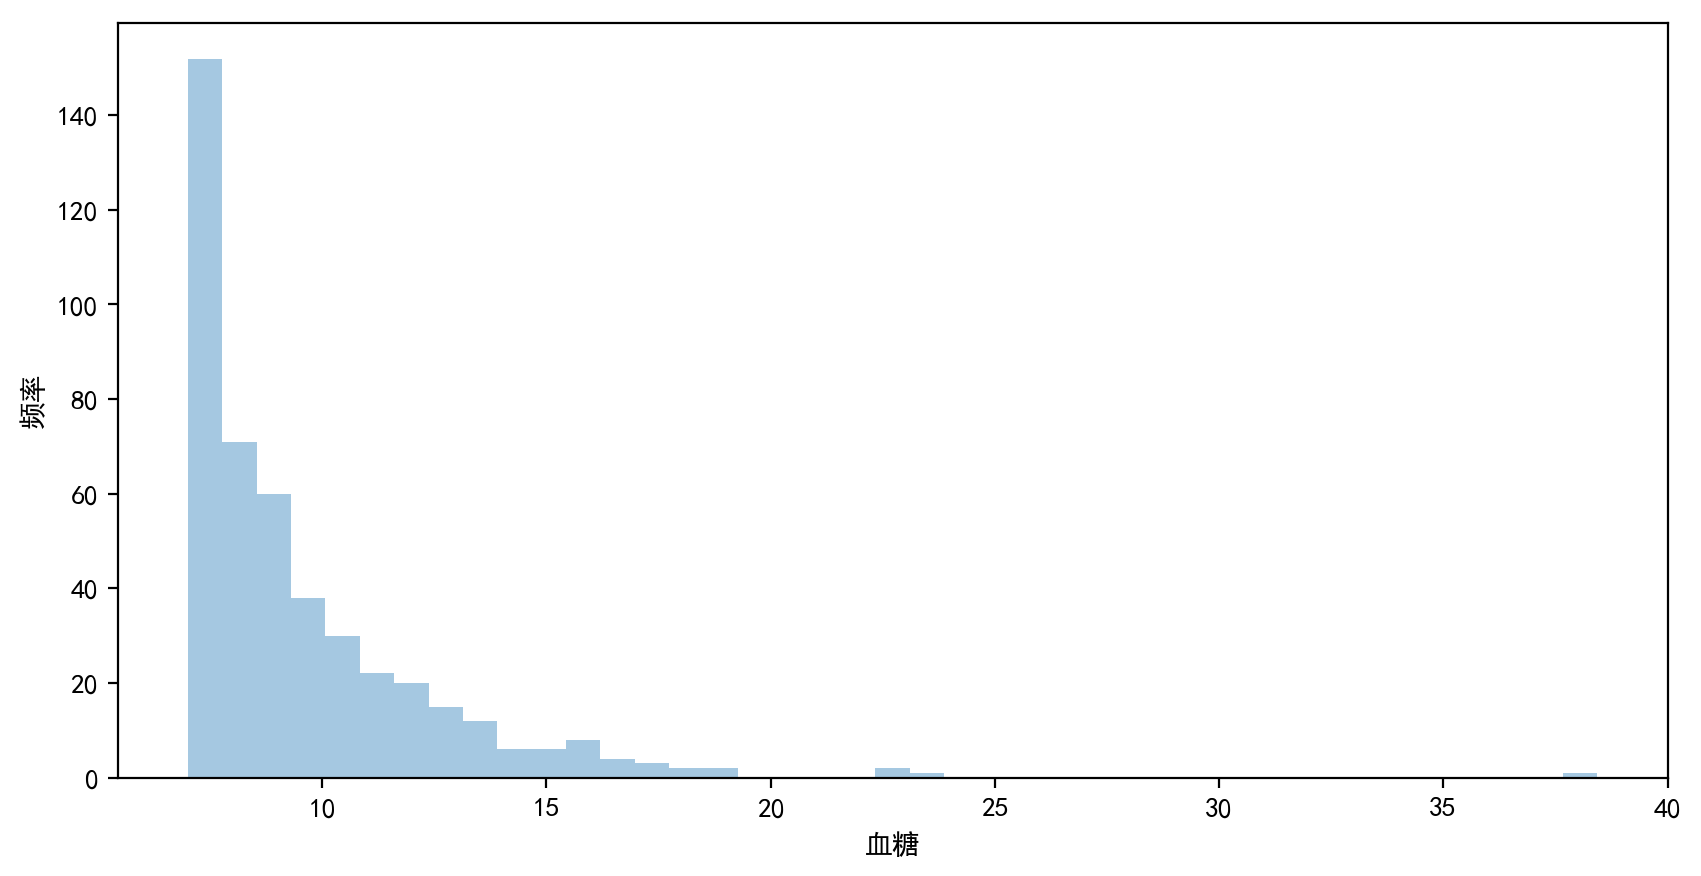

血糖高于7的患者个数： 455


In [6]:
#高血糖统计
fig=plt.figure(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
height = train_df[train_df['血糖']>7]
sns.distplot(height['血糖'],kde=False)
plt.ylabel('频率')
plt.show()
print('血糖高于7的患者个数：',len(height))

血糖高于7的患者个数： 455
共有5500名患者，只有百分之十的患者血糖值在7以上，糖尿病的诊断：按照世界统一标准，空腹血糖等于或高于7.0mmol/L。
样本分布不连续，会对模型的学习和预测造成很大影响，需要对预测出来的数据进行后处理。

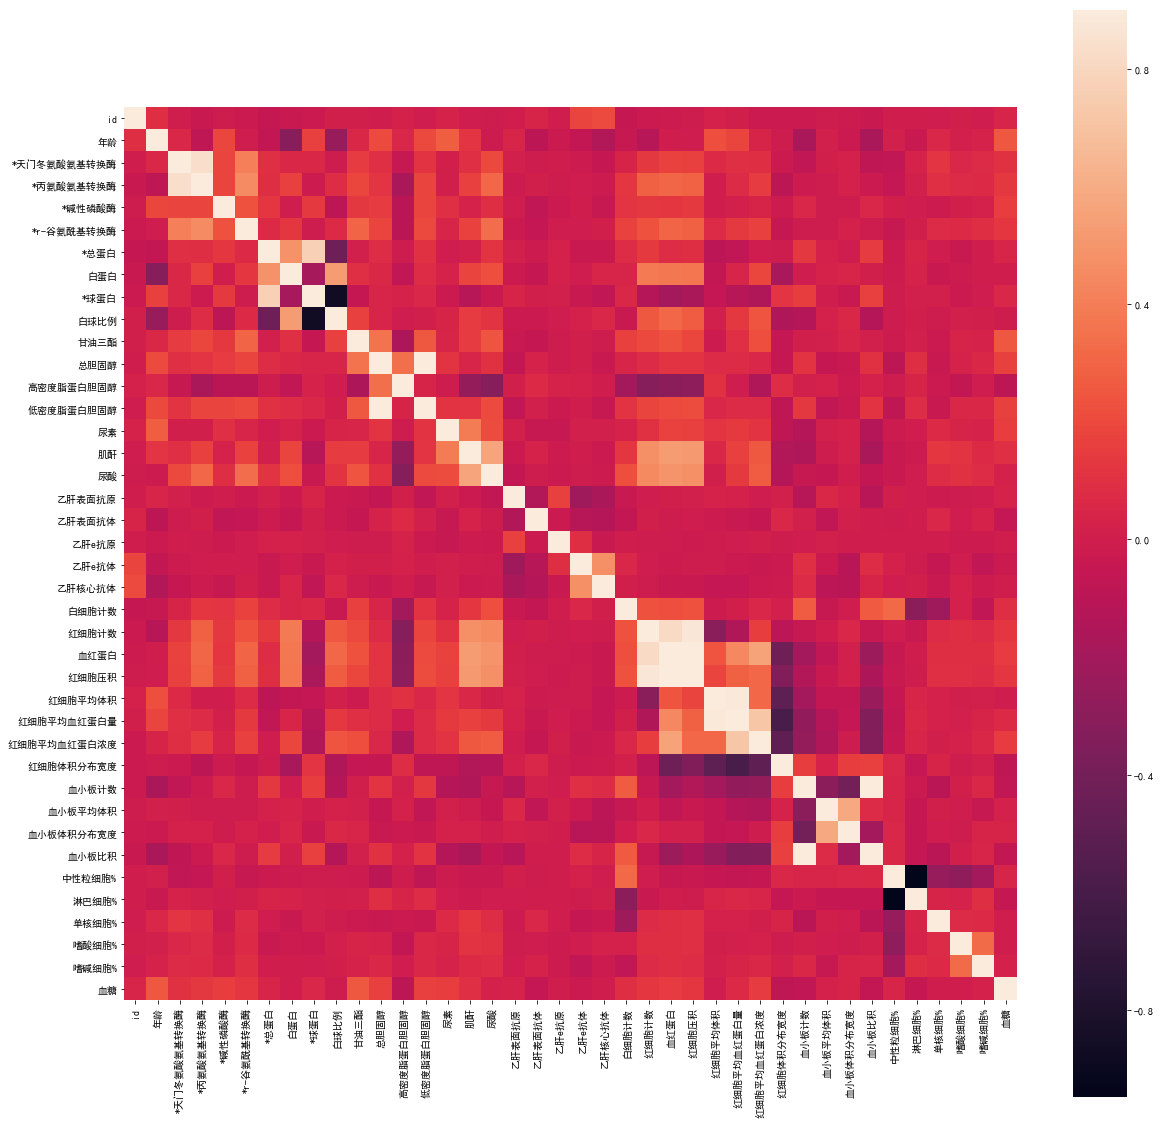

In [7]:
# 相关性矩阵
corrmat = train_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,vmax=0.9,square=True)
plt.show()

# 数据预处理
## 数据预处理包括空值填充、新建特征、对类别特征进行编码等

In [8]:
# 空值填充分两种，一种是空置太多的直接删除特征，一种是用均值或中值填充
def checknan(df):
    colnan = df.count() / df.shape[0]
    colnan = colnan[colnan < 0.5]
    return list(colnan.index)
def drop_fill(df):
    delcols = checknan(df)
    df.drop(delcols, 1, inplace=True) #删除缺失值多于一半的特征
    df.drop(['体检日期'], 1 ,inplace=True)
    df.fillna(-999, inplace=True)
    return df
def encode_cols(df):
    if isinstance(df['性别'][1],int):
        return 
    else:
        df['性别'] = df['性别'].map({'男': 0, '女': 1, '??': 3})
        return df
train_df = drop_fill(train_df)

In [9]:
encode_cols(train_df) # 类别编码

,id,性别,年龄,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
0,1,0,41,24.96,23.10,99.59,20.23,76.88,49.60,27.28,...,166.0,9.9,17.4,0.164,54.1,34.2,6.5,4.7,0.6,6.06
1,2,0,41,24.57,36.25,67.21,79.00,79.43,47.76,31.67,...,277.0,9.2,10.3,0.260,52.0,36.7,5.8,4.7,0.8,5.39
2,3,0,46,20.82,15.23,63.69,38.17,86.23,48.00,38.23,...,241.0,8.3,16.6,0.199,48.1,40.3,7.7,3.2,0.8,5.59
3,4,1,22,14.99,10.59,74.08,20.22,70.98,44.02,26.96,...,252.0,10.3,10.8,0.260,41.7,46.5,6.7,4.6,0.5,4.30
4,5,1,48,20.07,14.78,75.79,22.72,78.05,41.83,36.22,...,316.0,11.1,14.0,0.350,56.6,33.1,9.1,0.6,0.6,5.42
5,6,1,74,23.72,22.59,81.23,23.35,76.46,45.85,30.61,...,249.0,8.5,17.0,0.211,42.9,47.0,7.1,2.1,1.0,5.97
6,7,0,31,24.97,25.53,109.03,65.42,80.82,46.40,34.42,...,246.0,10.8,13.3,0.270,52.9,32.0,11.3,3.1,0.7,5.11
7,8,0,55,37.32,40.03,88.49,25.15,74.17,41.63,32.54,...,282.0,10.5,13.0,0.300,52.8,36.9,6.6,2.8,0.9,5.94
8,9,0,39,21.70,39.17,102.91,67.09,76.12,49.31,26.81,...,275.0,9.8,11.4,0.270,53.1,35.9,7.3,3.3,0.4,5.66
9,10,1,35,18.89,15.79,78.21,25.75,75.94,46.64,29.30,...,247.0,10.7,12.6,0.270,65.6,27.3,5.4,1.0,0.7,5.48


In [10]:
#新建特征
train_df['高低胆固醇比例'] = train_df['低密度脂蛋白胆固醇'] / train_df['高密度脂蛋白胆固醇']
train_df['红白细胞比例'] = train_df['白细胞计数'] / train_df['红细胞计数']
train_df.drop(['id'], 1 ,inplace=True)

In [11]:
np.count_nonzero([train_df['血糖']>6.1])

911

# 特征工程
## 通过多种方法进行特征选择

In [12]:
# 通过随机森林对特征重要性进行排序
x = np.array(train_df.drop([ '血糖'], axis=1))
y = np.array(train_df['血糖'])
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

forest = RandomForestRegressor()
forest.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
feature_importance = forest.feature_importances_  # 得到对应importance 的 array 
indices = np.argsort(feature_importance)[::-1]

In [14]:
cols = list(train_df.columns.drop('血糖'))

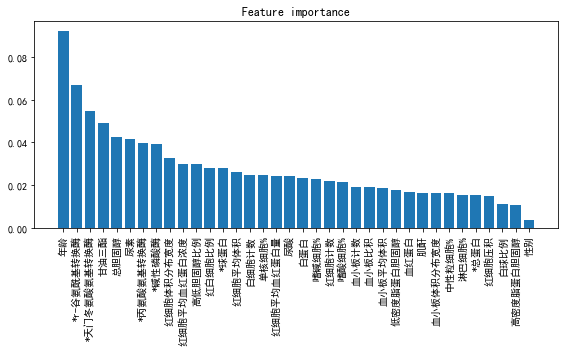

In [15]:
plt.subplots(figsize=(8,5))
plt.title('Feature importance')
plt.bar(range(x.shape[1]), feature_importance[indices])
plt.xticks(range(x.shape[1]),np.array(cols)[indices], rotation=90)
plt.tight_layout()
plt.show()

根据特征重要性排序可以看出，年龄和甘三油脂对血糖的影响比较明显，这也比较符合常理。据查，甘油三酯是由于胰岛素的敏感性不够，所以需要更多的胰岛素来维持血糖正常水平，同时这个时候甘油会结合脂肪酸变成甘油三酯。甘油三酯>2.8mmol/L的成年人差不多八成在5-8年后成为糖尿病患者或者糖尿病高危人群。这为

# 模型训练
## 切分数据集， 交叉验证 ， 选择模型 ，单个模型调参（重要参数） 

讲一下交叉验证
https://blog.csdn.net/Dream_angel_Z/article/details/47048285

In [16]:
# 单个模型参数的选择
# 调参实验 ， gridcv, cv score ， 多个评分标准
# 分别对RandomForest, XGBoost, CatBoost, CNN 进行调参

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [18]:
def show_scatter(y, y_pred, legend0, legend1, showlenth=10):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(range(showlenth),y[:showlenth], label=legend0)
    ax.scatter(range(showlenth),y_pred[:showlenth],label =legend1)
    plt.legend()
    plt.show()

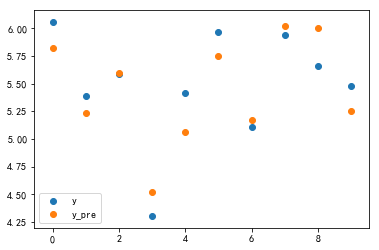

0.47674468167316564


In [23]:
# Randomforest 默认参数
model_rf = RandomForestRegressor(oob_score=True, random_state= 100)
model_rf.fit(x, y)
y_pred = model_rf.predict(x)
show_scatter(y, y_pred, 'y', 'y_pre')
print(metrics.mean_squared_error(y, y_pred))

In [27]:
# 选择不同的n_estimator
# n_estimators = range(10,101,10)
# for n_estimator in n_estimators:
#     model_rf = RandomForestRegressor(n_estimators=n_estimator,oob_score=True, random_state= 100)
#     model_rf.fit(x, y)
#     y_pred = model_rf.predict(x)
# #     show_scatter(y, y_pred, 'y', 'y_pre')
#     print('n_estimator:%d',n_estimator,metrics.mean_squared_error(y, y_pred))
model_rf = RandomForestRegressor(oob_score=True, random_state= 100)
param_test1 = {'n_estimators':range(10,101,10)}
grid_cv = GridSearchCV(estimator=model_rf, param_grid= param_test1, scoring='neg_mean_squared_error', cv=5)
grid_cv.fit(x, y)
print(grid_cv.cv_results_, grid_cv.best_params_, grid_cv.best_score_)

{'mean_fit_time': array([0.97969627, 1.9868165 , 2.98272352, 3.9800251 , 4.93410149,
       5.80392222, 6.8510612 , 7.61419826, 8.54966307, 9.49553351]), 'std_fit_time': array([0.02421309, 0.09109653, 0.08991173, 0.09600312, 0.15714133,
       0.12804218, 0.25067787, 0.09332632, 0.09815743, 0.11266948]), 'mean_score_time': array([0.0042057 , 0.00560236, 0.00900626, 0.01140857, 0.01400681,
       0.01620941, 0.0204144 , 0.02181134, 0.02441859, 0.02701273]), 'std_score_time': array([2.39969452e-03, 4.89042781e-04, 6.30754544e-04, 4.93265673e-04,
       6.28734094e-04, 3.95570651e-04, 2.33380228e-03, 7.49173344e-04,
       1.01736725e-03, 5.53747360e-06]), 'param_n_estimators': masked_array(data=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 10}, {'n_estimators': 20}, {'n_estimators': 30}, {'n_estimators': 40

In [33]:
grid_cv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=100, verbose=0, warm_start=False)